In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
import bt
import pandas as pd
import yfinance as yf
import numpy as np

c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


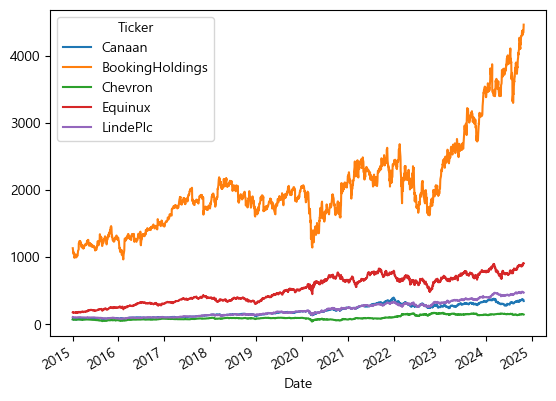

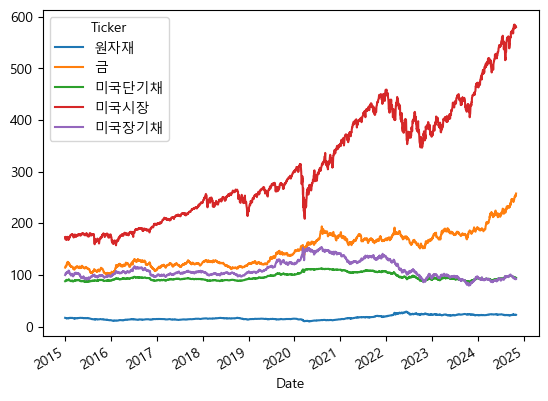

In [3]:
start = '2015-01-01'
end = '2024-10-31'

# 데이터 불러오기
data = pd.read_csv(f'/Users/user/Desktop/수금의왕/sector(assets)_개별종목_호준.csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

data.plot()




# 벤치마크 데이터 불러오기
df = pd.read_csv(f'/Users/user/Desktop/수금의왕/벤치마크종목.csv', encoding="utf-8")
tickers = df['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(df['티커'], df['섹터(자산군)']))

# 데이터 다운로드
df = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
df.rename(columns=ticker_to_name, inplace=True)

df.plot()


data.replace(0, np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [4]:
s = bt.Strategy('SangWon',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                #  bt.algos.WeighEqually(),
                 bt.algos.WeighSpecified(**{
                    'BKNG': 0.2192,
                    'LIN': 0.0090,
                    'CVX': 0.0148,
                    'EQIX': 0.7472,
                    'ACN' : 0.0098
                     }),            
                 bt.algos.Rebalance()
                 ])

bt1 = bt.Backtest(s, data, initial_capital=10000000)

In [5]:
# 벤치마크 - 미국시장
def buy_and_hold(df, name='buy_and_hold') :
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, df, initial_capital=10000000)


SPY = buy_and_hold(df['미국시장'].to_frame(), name='SPY')

In [6]:
# 벤치마크 - 올웨더
all_weather = bt.Strategy('all_weather',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.30,
                     '미국장기채': 0.40,
                     '미국단기채': 0.15,
                     '금': 0.055,
                     '원자재': 0.075
                     }),            
                 bt.algos.Rebalance()
                 ])

all_weather = bt.Backtest(all_weather, df, initial_capital=10000000)

In [7]:
# 벤치마크 - 영구포트폴리오
permanant = bt.Strategy('permanant',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.25,
                     '미국장기채': 0.25,
                     '금': 0.25,
                     '원자재': 0.25
                     }),            
                 bt.algos.Rebalance()
                 ])

permanant = bt.Backtest(permanant, df, initial_capital=10000000)

In [8]:
res = bt.run(bt1, all_weather, permanant, SPY)

  0%|          | 0/4 [00:00<?, ?it/s]


Exception: Cannot allocate capital to BKNG because price is 0 as of 2015-01-02 00:00:00+00:00